# Use PyBEDTools to calculate overlaps

In [2]:
import pyranges as pr
import pybedtools as pb
import pandas as pd
from io import StringIO

/home/chlab/flync/.venv/lib/python3.12/site-packages/sorted_nearest/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
all_nb = pr.read_gtf('/mnt/d/flync_final_runs/Marques2021_FASTQ/final_run_nb/assemblies/merged.gtf')
new_nb = pr.read_gtf('/mnt/d/flync_final_runs/Marques2021_FASTQ/final_run_nb/assemblies/merged-new-transcripts.gtf')
ncr_nb = pd.read_excel('marques2021/flync_marquess2021_inference_predictions_nb.xlsx')
all_neuron = pr.read_gtf('/mnt/d/flync_final_runs/Marques2021_FASTQ/final_run_neurons/assemblies/merged.gtf')
new_neuron = pr.read_gtf('/mnt/d/flync_final_runs/Marques2021_FASTQ/final_run_neurons/assemblies/merged-new-transcripts.gtf')
ncr_neuron = pd.read_excel('marques2021/flync_marquess2021_inference_predictions_neuron.xlsx')

all_nb_transcripts = all_nb[all_nb.Feature == 'transcript']
new_nb_transcripts = new_nb[new_nb.Feature == 'transcript']
all_neuron_transcripts = all_neuron[all_neuron.Feature == 'transcript']
new_neuron_transcripts = new_neuron[new_neuron.Feature == 'transcript']

ncr_nb = ncr_nb[ncr_nb['pred']].reset_index()
ncr_neuron = ncr_neuron[ncr_neuron['pred']].reset_index()

ncr_nb['strand'] = '-'
ncr_neuron['strand'] = '-'

ncr_nb = ncr_nb[['chromosome', 'start', 'end', 'strand', 'index']]
ncr_neuron = ncr_neuron[['chromosome', 'start', 'end', 'strand', 'index']]

/home/chlab/flync/.venv/lib/python3.12/site-packages/pyranges/readers.py:422: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  for df in df_iter:


In [4]:

all_nb_transcripts_bed = pb.BedTool(StringIO(all_nb_transcripts.to_bed(chain=True, keep=False))).saveas('marques2021/all_nb_transcripts.bed')
new_nb_transcripts_bed = pb.BedTool(StringIO(new_nb_transcripts.to_bed(chain=True, keep=False))).saveas('marques2021/new_nb_transcripts.bed')
ncr_nb_bed = pb.BedTool(StringIO(ncr_nb[['chromosome', 'start', 'end', 'strand', 'index']].to_csv(sep='\t', header=False, index=False))).saveas('marques2021/ncr_nb_transcripts.bed')
all_neuron_transcripts_bed = pb.BedTool(StringIO(all_neuron_transcripts.to_bed(chain=True, keep=False))).saveas('marques2021/all_neuron_transcripts.bed')
new_neuron_transcripts_bed = pb.BedTool(StringIO(new_neuron_transcripts.to_bed(chain=True, keep=False))).saveas('marques2021/new_neuron_transcripts.bed')
ncr_neuron_bed = pb.BedTool(StringIO(ncr_neuron[['chromosome', 'start', 'end', 'strand', 'index']].to_csv(sep='\t', header=False, index=False))).saveas('marques2021/ncr_neuron_transcripts.bed')

In [5]:
intersected_all = all_nb_transcripts_bed.intersect(all_neuron_transcripts_bed, F=1.0, u=True)
intersected_new = new_nb_transcripts_bed.intersect(new_neuron_transcripts_bed, F=1.0, u=True)
intersected_ncr = ncr_nb_bed.intersect(ncr_neuron_bed, F=1.0, u=True)

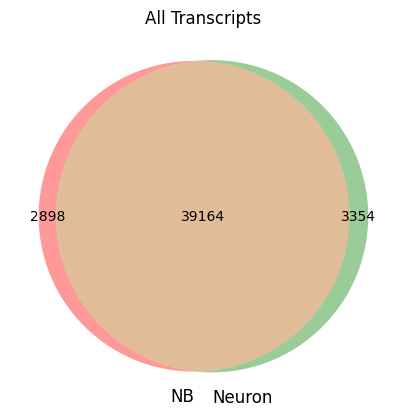

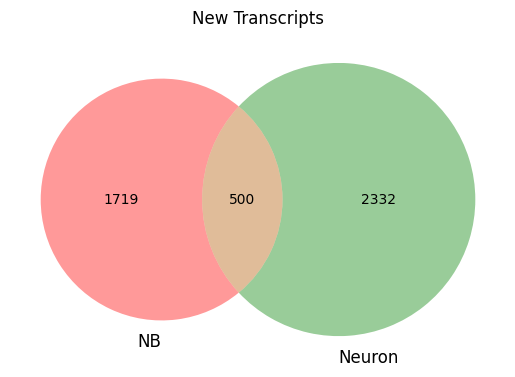

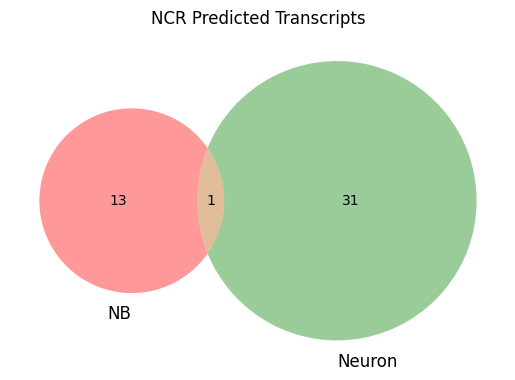

In [6]:
# Create a Venn diagram to visualize the overlaps
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

venn2(subsets=(all_nb_transcripts.df.shape[0]-intersected_all.count(), all_neuron_transcripts.df.shape[0]-intersected_all.count(),
               intersected_all.count()), set_labels=('NB', 'Neuron'))
plt.title("All Transcripts")
plt.show()

venn2(subsets=(new_nb_transcripts.df.shape[0]-intersected_new.count(), new_neuron_transcripts.df.shape[0]-intersected_new.count(),
               intersected_new.count()), set_labels=('NB', 'Neuron'))
plt.title("New Transcripts")
plt.show()

venn2(subsets=(ncr_nb.shape[0]-intersected_ncr.count(), ncr_neuron.shape[0]-intersected_ncr.count(),
               intersected_ncr.count()), set_labels=('NB', 'Neuron'))
plt.title("NCR Predicted Transcripts")
plt.show()

In [7]:
# ALL transcripts overlap count
# Overlap count
intersected_all.count()
# Nb - overlap count
all_nb_transcripts.df.shape[0] - intersected_all.count()
# Neuron - overlap count
all_neuron_transcripts.df.shape[0] - intersected_all.count()

3354

In [8]:
# New transcripts overlap count
# Overlap count
intersected_new.count()
# Nb - overlap count
new_nb_transcripts.df.shape[0] - intersected_new.count()
# Neuron - overlap count
new_neuron_transcripts.df.shape[0] - intersected_new.count()

2332

In [9]:
# NCR predicted transcripts overlap count
# Overlap count
intersected_ncr.count()
# Nb - overlap count
ncr_nb.shape[0] - intersected_ncr.count()
# Neuron - overlap count
ncr_neuron.shape[0] - intersected_ncr.count()

31

In [11]:
# Print summary
print("ALL Transcripts Overlap Count:")
print(f"Overlap count: {intersected_all.count()}")
print(f"Total NB - overlap count: {all_nb_transcripts.df.shape[0] - intersected_all.count()}")
print(f"Total Neuron - overlap count: {all_neuron_transcripts.df.shape[0] - intersected_all.count()}")
print("\nNew Transcripts Overlap Count:")
print(f"Overlap count: {intersected_new.count()}")
print(f"Total NB - overlap count: {new_nb_transcripts.df.shape[0] - intersected_new.count()}")
print(f"Total Neuron - overlap count: {new_neuron_transcripts.df.shape[0] - intersected_new.count()}")
print("\nNCR Predicted Transcripts Overlap Count:")
print(f"Overlap count: {intersected_ncr.count()}")
print(f"Total NB - overlap count: {ncr_nb.shape[0] - intersected_ncr.count()}")
print(f"Total Neuron - overlap count: {ncr_neuron.shape[0] - intersected_ncr.count()}")

ALL Transcripts Overlap Count:
Overlap count: 39164
Total NB - overlap count: 2898
Total Neuron - overlap count: 3354

New Transcripts Overlap Count:
Overlap count: 500
Total NB - overlap count: 1719
Total Neuron - overlap count: 2332

NCR Predicted Transcripts Overlap Count:
Overlap count: 1
Total NB - overlap count: 13
Total Neuron - overlap count: 31
